# LightGBM example

**Example using the lgbm function in the MLRegression module**

The **lgbm** function in the MLRegression module provides output of fitted regression model and summary statistics using the XGBoost function

The **lgbm** function standardizes the X input by default. 

This example shows how to test the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the MLRegression module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [1]:
# # Run the following commands to install MLRegression for the first time
# !pip install git+https://github.com/gjpelletier/MLRegression.git

# # Run the following commands to upgrade MLRegression to the latest versions
# !pip install git+https://github.com/gjpelletier/MLRegression.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into training and testing subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting LGBMRegressor models, please wait ...


LGBMRegressor statistics of fitted ensemble model in model_outputs['stats']:


| Statistic          |   LGBMRegressor |
|:-------------------|----------------:|
| r-squared          |     0.92268     |
| adjusted r-squared |     0.920419    |
| n_samples          |   353           |
| df residuals       |   343           |
| df model           |     9           |
| F-statistic        |   454.789       |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    21.6755      |
| Log-Likelihood     | -1586.78        |
| AIC                |  3193.56        |
| BIC                |  3232.22        |


Done
Time elapsed: 24.42 sec


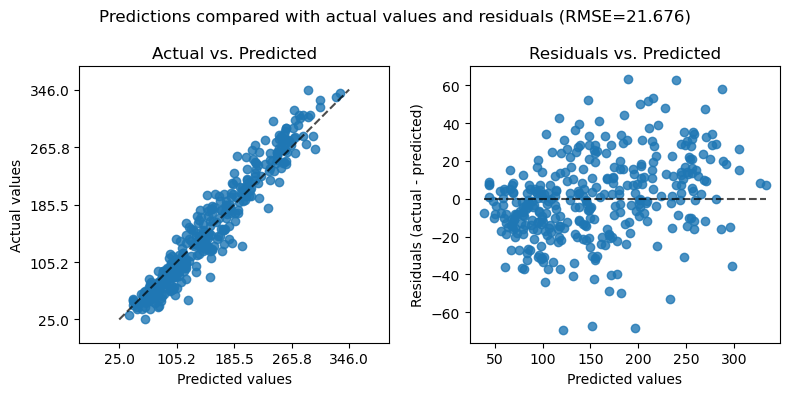

In [5]:
from MLRegression import lgbm
train_model, train_output = lgbm(X_train, y_train)

## Test the model with the testing data subset

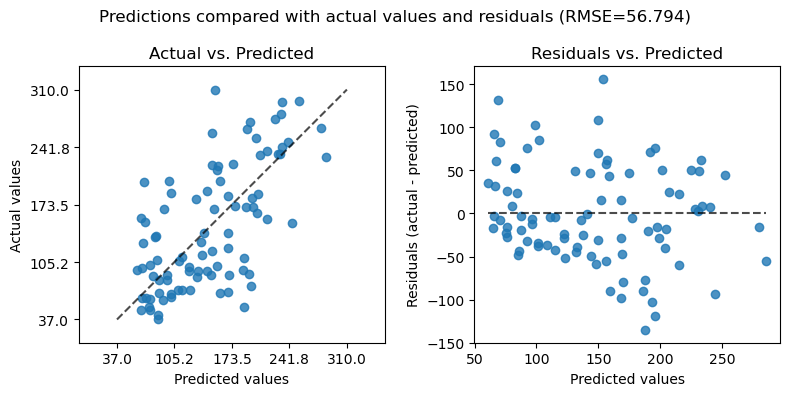

In [6]:
from MLRegression import plot_predictions_from_test
fig = plot_predictions_from_test(train_model, X_test, y_test, scaler=train_output['scaler'])
fig.savefig("LGBMRegressor_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting LGBMRegressor models, please wait ...


LGBMRegressor statistics of fitted ensemble model in model_outputs['stats']:


| Statistic          |   LGBMRegressor |
|:-------------------|----------------:|
| r-squared          |     0.932201    |
| adjusted r-squared |     0.930628    |
| n_samples          |   442           |
| df residuals       |   432           |
| df model           |     9           |
| F-statistic        |   659.971       |
| Prob (F-statistic) |     1.11022e-16 |
| RMSE               |    20.051       |
| Log-Likelihood     | -1952.41        |
| AIC                |  3924.82        |
| BIC                |  3965.73        |


Done
Time elapsed: 31.55 sec


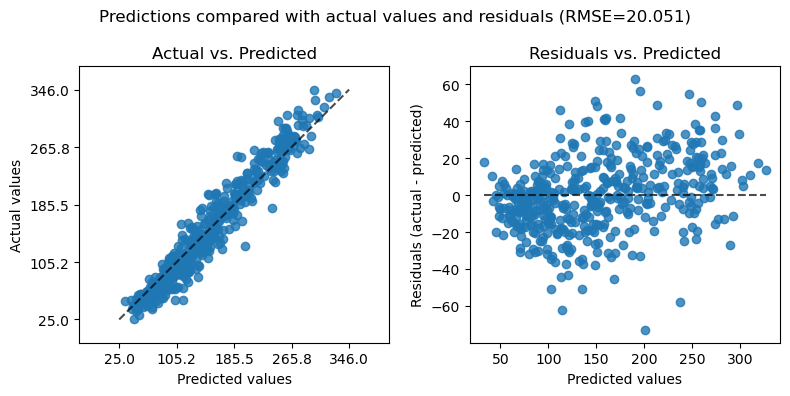

In [7]:
from MLRegression import lgbm
final_model, final_output = lgbm(X, y)

## User instructions

In [8]:
help(lgbm)

Help on function lgbm in module MLRegression:

lgbm(X, y, **kwargs)
    Linear regression with LightGBM
    Beta version

    by
    Greg Pelletier
    gjpelletier@gmail.com
    03-June-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        verbose= 'on' (default) or 'off' where
            'on': provide model summary at each step
            'off': provide model summary for only the final selected model
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X (only used if X is already standardized)
        boosting_type='gbdt',  # Gradient Boosting Decision Tree (default boosting method